# Project : Wrangle and Analyze Data
**Udacity Data Analyst Nanodegree** <br>
**By Yasmeen Mubarak** <br>
**10 Feb 2019** <br>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
    
<li><a href="#gather">Gathering Data</a></li>

<li><a href="#assess">Assessing Data</a></li>

<li><a href="#clean">Cleaning Data</a></li>

<li><a href="#analyze">Analyze Data</a></li>

<li><a href="#resources">Resources</a></li>

</ul>

<a id='intro'></a>
## Introduction

Real-world data rarely comes clean. Using Python and its libraries, we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling.<br>

The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates) , also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "[they're good dogs Brent.](https://knowyourmeme.com/memes/theyre-good-dogs-brent)" WeRateDogs has over 4 million followers and has received international media coverage.<br>

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for us to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.<br>

## The Data
**Enhanced Twitter Archive**

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, like rating, dog name, and dog stage.<br>

**Additional Data via the Twitter API**

Additional Data via the Twitter API: query Twitter's API to gather retweet count and favorite count.<br>

**Image Predictions File**

Contains tweet ID, image URL, and the image number that corresponded to the most confident prediction.<br>

<a id='gather'></a>
## Gather

In [1]:
# Import all the packages we need for this project
import pandas as pd
import numpy as np
import seaborn as sns
import tweepy
import requests
import time
import json
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')

In [91]:
# Load the first data : Twitter archive
archive = pd.read_csv('C://Users//-//Downloads//twitter-archive-enhanced.csv')

In [92]:
# Requests data programmatically from Udacity website
URL = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
predictions = requests.get(URL)

# Save the data as a text file
with open("image_predictions.tsv", 'wb') as text_file:
        text_file.write(predictions.content)
        
# Load the second data : Tweet image predictions
image = pd.read_csv('image_predictions.tsv', sep='\t')

In [158]:
# keys from authorizing an application to access Twitter account data
consumer_key = '****'
consumer_secret = '****'
access_token = '****'
access_secret = '****'

# variables for Twitter API connection
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [93]:
# Load the thrid data using a Twitter API
# Add each tweet to a new line of tweet_json.txt
with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

In [94]:
# Append each tweet into a list
df_list = []
tweet_file = open('tweet_json.txt', "r")

# For loop to add each available tweet to a new line of tweet_json.txt
for line in tweet_file:
    try:
        tweet = json.loads(line)
        df_list.append(tweet)
    except:
        continue
        
tweet_file.close()

In [95]:
# Create tweet_data into DataFrame
tweet_data = pd.DataFrame()

# Add variables to the dataframe : tweet id & retweet count & favorite count
tweet_data['tweet_id'] = list(map(lambda tweet: tweet['id'], df_list))
tweet_data['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], df_list))
tweet_data['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], df_list))

<a id='assess'></a>
## Assess

### Visual assessment

First we will assess **Enhanced Twitter Archive** data.

In [7]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### `archive` table
This table contains 2356 rows × 17 columns.<br>

`archive` columns:

- **tweet_id**: id of each tweet.
- **in_reply_to_status_id**: this field will be integer representation of the original Tweet’s ID, if the represented Tweet is a reply.
- **in_reply_to_user_id**: this field will contain the integer representation of the original Tweet’s author ID. if the represented Tweet is a reply.
- **timestamp**: the date and the time of each tweet.
- **source**: where the tweet originated.
- **text**: The actual UTF-8 text of the status update.
- **retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp**: Retweets can be distinguished from typical Tweets by the existence of a retweeted_status attribute.
- **retweeted_status_id**: status identifier for retweets
- **retweeted_status_user_id**: user identifier for retweets
- **retweeted_status_timestamp**: time of retweet
- **expanded_urls**: URL of the tweet.
- **rating_numerator**: The top number of a fraction, most have ratings above the max of 10.
- **rating_denominator**: The bottom number of a fraction.
- **name**: the dog name.
- **doggo,floofer,pupper,puppo**: Dog stage (adult, fluffy,young, young to adult)

#### Quality

- Missing values in (in_reply_to_status_id - in_reply_to_user_id - retweeted_status_id - retweeted_status_user_id - retweeted_status_timestamp) columns.
- invalid names in name column like (the, a, an,..).
- Null objects are non-null in (doggo,floofer,pupper,puppo, name) columns.
- Lowercase names in name column.
- Some value in (rating_denominator) column not equal to 10, which is incorrect.
- Unnecessary columns like (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, ..).


#### Tidiness

- The Four variables (doggo,floofer,pupper,puppo) in one column (dog_stage).

Then we will assess **Image Predictions** data.

In [8]:
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### `image` table
This table contains 2075 rows × 12 columns. <br>

`image` columns:

- **tweet_id**: the last part of the tweet URL after "status/" https://twitter.com/dog_rates/status/889531135344209921 .
- **jpg_URL**: Where the image is hosted
- **img_num**: Image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)
- **p1**: the algorithm's `#1` prediction for the image in the tweet → golden retriever.
- **p1_conf**: how confident the algorithm is in its `#1` prediction → 95%.
- **p1_dog**: whether or not the `#1` prediction is a breed of dog → TRUE.
- **p2**: the algorithm's second most likely prediction → Labrador retriever.
- **p2_conf**: how confident the algorithm is in its `#2` prediction → 1%.
- **p2_dog**: whether or not the `#2` prediction is a breed of dog → TRUE.


#### Quality

- Some rows have lowercase and others uppercase in (p1, p2, p3) columns.
- Columns names are not understandable.
- Unnecessary columns like (jpg_URL, img_num).

Now we will assess **Additional Data via the Twitter API**.

In [9]:
tweet_data

,tweet_id,retweet_count,favorite_count
0,892177421306343426,6128,32614
1,891815181378084864,4059,24558
2,891689557279858688,8441,41325
3,891327558926688256,9142,39506
4,891087950875897856,3042,19855
5,890971913173991426,2014,11602
6,890729181411237888,18404,64071
7,890609185150312448,4176,27262
8,890240255349198849,7198,31284
9,890006608113172480,7157,30061


### `tweet_data` table
This table contains 2339 rows × 3 columns. <br>


`tweet_data` columns:
- **tweet_id**: id of each tweet.
- **retweet_count**: the number of retweets of each tweet.
- **favorite_count**: the number of favorites of each tweet.

#### Quality
In the archive data there are 2356 rows and in the tweet_data 2339 rows, so there is missing data.


#### Tidiness
tweet_data and image tables should be combined with the archive table.

### Programmatic Assessment

First we will assess **Enhanced Twitter Archive** data.

In [10]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
archive.tweet_id.nunique()

2356

In [12]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
298,837012587749474308,NaN,NaN,2017-03-01 18:52:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KennyFromDaBlok: 14/10 h*ckin good hats. w...,8.370113e+17,726634734.0,2017-03-01 18:47:10 +0000,https://twitter.com/KennyFromDaBlok/status/837...,14,10,None,None,None,None,None
1232,713175907180089344,NaN,NaN,2016-03-25 01:29:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Opie and Clarkus. Clarkus fell as...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713175907...,10,10,Opie,None,None,None,None
336,832636094638288896,NaN,NaN,2017-02-17 17:01:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Orion. He just got back from the denti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832636094...,12,10,Orion,None,None,None,None
881,760521673607086080,NaN,NaN,2016-08-02 17:04:31 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Doggo want what doggo cannot have. Temptation ...,NaN,NaN,NaN,https://vine.co/v/5ApKetxzmTB,12,10,None,doggo,None,None,None
1070,740359016048689152,NaN,NaN,2016-06-08 01:45:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chase. He's in a predicament. 9/10 hel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740359016...,9,10,Chase,None,None,None,None


In [14]:
archive.name.value_counts()

None              745
a                  55
Charlie            12
Cooper             11
Oliver             11
Lucy               11
Lola               10
Tucker             10
Penny              10
Bo                  9
Winston             9
the                 8
Sadie               8
Bailey              7
an                  7
Toby                7
Daisy               7
Buddy               7
Rusty               6
Jax                 6
Bella               6
Leo                 6
Koda                6
Scout               6
Dave                6
Milo                6
Oscar               6
Jack                6
Stanley             6
Finn                5
                 ... 
Karma               1
Ralphus             1
Obie                1
Beya                1
Sobe                1
Lambeau             1
Storkson            1
Michelangelope      1
Boots               1
Skittles            1
Huxley              1
Akumi               1
Brandi              1
Aubie               1
Rover     

In [15]:
archive.retweeted_status_id.value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17    1
7.001438e+17    1
8.482894e+

In [16]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [17]:
# check if there is duplicate in the data
sum(archive.duplicated())

0

In [18]:
archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [19]:
archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [20]:
archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [21]:
archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [22]:
# print specific row and specific columns with two types of stages
archive.iloc[191,13:17]

doggo      doggo
floofer     None
pupper      None
puppo      puppo
Name: 191, dtype: object

In [23]:
# View samples of invalid name, which they have lowercase
archive.loc[archive.name.str.islower()].sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2235,668171859951755264,NaN,NaN,2015-11-21 20:59:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Trans Siberian Kellogg named Alfonso...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668171859...,7,10,a,None,None,None,None
1854,675534494439489536,NaN,NaN,2015-12-12 04:35:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Seriously guys?! Only send in dogs. I only rat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675534494...,11,10,a,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Speckled Cauliflower Yosemite named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360...,9,10,a,None,None,None,None
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Dasani Kingfisher from Maine. His na...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667177989...,8,10,a,None,None,None,None


In [24]:
# count value of 'name' with lowercase
archive.loc[archive.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
quite            4
just             4
one              4
not              2
actually         2
mad              2
getting          2
my               1
space            1
his              1
old              1
life             1
this             1
incredibly       1
such             1
all              1
infuriating      1
officially       1
light            1
by               1
unacceptable     1
Name: name, dtype: int64

### `archive` table

#### Quality
- Some difficulty reading the HTML format in (source) column.
- Missing values in (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) columns.
- invalid names in name column like (the, a, an, very, quite,..) which all lowercase.
- Some value in (rating_denominator) column not equal to 10, which is incorrect. We think they are not extracted properly from (text) column.
- Null objects are non-null in (doggo, floofer, pupper, puppo, name) columns.
- Incorrect datatype in (timestamp, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_timestamp, retweeted_status_id, retweeted_status_user_id) columns.
- This table contains retweets.
- Some value in (rating_denominator) column not equal to 10, which is incorrect. And there (text) does not contians the correct rating.
- After the cleaning we found some value in (rating_denominator) are null values. 
- Unnecessary columns like (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, ..). 

#### Tidiness
- The Four variables (doggo,floofer,pupper,puppo) in one column (dog_stage).


Then we will assess **Image Predictions** data.

In [25]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
image.tweet_id.nunique()

2075

In [27]:
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
677,683481228088049664,https://pbs.twimg.com/media/CXw2jSpWMAAad6V.jpg,1,keeshond,0.508951,True,chow,0.442016,True,German_shepherd,0.013206,True
1367,761745352076779520,https://pbs.twimg.com/media/CpJDWqhW8AAFt45.jpg,1,paddle,0.393118,False,canoe,0.178088,False,lakeside,0.099713,False
1480,780858289093574656,https://pbs.twimg.com/media/CtYqeNHWgAATqYZ.jpg,1,Chesapeake_Bay_retriever,0.488555,True,Sussex_spaniel,0.271655,True,kelpie,0.106913,True
588,679111216690831360,https://pbs.twimg.com/ext_tw_video_thumb/67911...,1,kelpie,0.189423,True,beagle,0.121988,True,basset,0.121171,True
440,674447403907457024,https://pbs.twimg.com/media/CVweVUfW4AACPwI.jpg,1,Brabancon_griffon,0.409909,True,malinois,0.244649,True,bull_mastiff,0.074820,True


In [120]:
image.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
Maltese_dog                   18
Shetland_sheepdog             18
teddy                         18
beagle                        18
Eskimo_dog                    18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [29]:
image.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Pembroke                           27
collie                             27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
malinois                           20
Samoyed                            20
miniature_pinscher                 20
chow                               20
toy_terrier                        20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [122]:
image.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pomeranian                        29
toy_poodle                        29
Pekinese                          29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
b

In [30]:
image.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [124]:
image.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [31]:
image.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [126]:
# check if there is duplicate in the data
sum(image.duplicated())

0

### `image` table

#### Quality

- In the archive data there are 2356 rows and in the image data 2075 rows, so there is missing data, or 281 tweets have no image. 
- Unnecessary underscore in (p1, p2, p3) columns.
- Some rows have lowercase and others uppercase in (p1, p2, p3) columns.
- Some rows in (p1_dog, p2_dog, p3_dog) columns are false, this means they are not dogs.
- Unnecessary columns like (jpg_URL, img_num).

Now we will assess **Additional Data via the Twitter API**.

In [32]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2681 entries, 0 to 2680
Data columns (total 3 columns):
tweet_id          2681 non-null int64
retweet_count     2681 non-null int64
favorite_count    2681 non-null int64
dtypes: int64(3)
memory usage: 62.9 KB


In [33]:
tweet_data.tweet_id.nunique()

2340

In [34]:
tweet_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.681000e+03,2681.000000,2681.000000
mean,7.570946e+17,3255.066393,9500.419620
std,7.507710e+16,5061.233590,13541.686483
min,6.660209e+17,0.000000,0.000000
25%,6.816795e+17,645.000000,1459.000000
50%,7.472042e+17,1665.000000,3994.000000
75%,8.320328e+17,3897.000000,13223.000000
max,8.924206e+17,83426.000000,163982.000000


In [35]:
tweet_data.sample(5)

,tweet_id,retweet_count,favorite_count
1705,680130881361686529,1014,2387
2450,870656317836468226,2619,12262
749,778039087836069888,2864,9008
616,794355576146903043,11271,0
2337,666029285002620928,47,126


In [36]:
# check if there is duplicate in the data
sum(tweet_data.tweet_id.duplicated())

341

### `tweet_data` table

We have concluded the same observationv from visual assessment..

#### Quality
In the archive data there are 2356 rows and in the tweet_data 2339 rows, so there is missing data.


#### Tidiness
tweet_data and image tables should be combined with the archive table.

<a id='clean'></a>
## Clean

In [96]:
# Create copy for each dataframe to work with
clean_archive = archive.copy()
clean_image = image.copy()
clean_tweet = tweet_data.copy()

### Tidiness

####  1.The four columns (doggo, floofer, pupper, puppo) they should be in one column (dog_stage).

##### Define
merge *doggo*, *floofer*, *pupper* and *puppo* columns to into one column *dog_stage*.

##### Code

In [97]:
# use a for loop to replace all the 'None' with space before cat
stage = ['doggo','pupper', 'floofer', 'puppo']
for i in stage:
    clean_archive[i] = clean_archive[i].replace('None', '')

In [98]:
# use cat to combine all the columns
clean_archive['dog_stage'] = clean_archive['doggo'].str.cat(clean_archive[['pupper', 'floofer', 'puppo']], sep=',')

# change the first value from ',,,' to None
clean_archive['dog_stage'] = clean_archive['dog_stage'].replace(',,,', 'None')

In [99]:
# delete the one ',' in all values
clean_archive['dog_stage'] = clean_archive['dog_stage'].str.strip(',').astype(str)

# replace ',,,' in one value to ',' 
clean_archive['dog_stage'] = clean_archive['dog_stage'].str.replace(',,,', ',')

# replace ',,' in one value to ','
clean_archive['dog_stage'] = clean_archive['dog_stage'].str.replace(',,', ',')

In [100]:
# delete the 'doggo','floofer','pupper','puppo' colomns
clean_archive = clean_archive.drop(['doggo','floofer','pupper','puppo'], axis = 1)

##### Test

In [101]:
clean_archive.dog_stage.value_counts()

None             1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [102]:
clean_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


### Quality

#### 1.In the archive data there are 2356 rows and in the image data 2075 rows, so there is missing data, or 281 tweets have no image. 

##### Define
Remove all rows with no images information as Nan's values.

##### Code

In [103]:
# drop all the null in expanded_urls column
clean_archive = clean_archive[pd.notnull(clean_archive['expanded_urls'])]

##### Test

In [104]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null object
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
dog_stage                     2297 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 269.2+ KB


#### 2.Some value in (rating_denominator) column not equal to 10, which is incorrect. We think they are not extracted properly from (text) column.

##### Define
Correct all values in *rating_denominator* that not equal to 10 and the *text* column contians the correct rating.

##### Code

In [105]:
# Collect the values with the wrong rating_denominator
p = clean_archive[clean_archive.text.str.contains( 
    r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

# Use a for loop to correct all wrong rating
for i in p:
    mask = clean_archive.text == i
    clean_archive.loc[mask, 'rating_numerator'] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", i)
    clean_archive.loc[mask, 'rating_denominator'] = 10

##### Test

In [106]:
# Print all rwos with this problem
clean_archive[clean_archive.text.isin(p)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
561,802624713319034886,NaN,NaN,2016-11-26 21:26:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Yep... just as I suspected. Yo...",7.776842e+17,4.196984e+09,2016-09-19 01:42:24 +0000,https://twitter.com/dog_rates/status/777684233...,11,10,None,None
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/777684233...,11,10,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,14,10,None,None
860,763167063695355904,NaN,NaN,2016-08-10 00:16:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Eve. She's a raging alcoho...,6.732953e+17,4.196984e+09,2015-12-06 00:17:55 +0000,https://twitter.com/dog_rates/status/673295268...,11,10,Eve,pupper
1007,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747600769...,7,10,Bookstore,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,14,10,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,13,10,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,11,10,Bluebert,None
1222,714258258790387713,NaN,NaN,2016-03-28 01:10:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Travis and Flurp. Travis is pretty chill ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714258258...,8,10,Travis,None
1359,703356393781329922,NaN,NaN,2016-02-26 23:10:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Socks. That water pup w the super legs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703356393...,2,10,Socks,None


#### 3.Null objects are non-null in (doggo, floofer, pupper, puppo, name) columns which is now one column *dog_stage*.

##### Define
Replace all None values to null.

##### Code

In [107]:
# Replace None values with NaN
clean_archive['dog_stage'] = clean_archive['dog_stage'].replace('None',np.nan)

##### Test

In [108]:
clean_archive.dog_stage.value_counts()

pupper           243
doggo             80
puppo             28
doggo,pupper      12
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

#### 4.Unnessary underscore in (p1, p2, p3) columns. And Some rows have lowercase and others uppercase in (p1, p2, p3) columns.

##### Define
Replace the underscore in *p1*, *p2*, *p3* columns with space. And capitalize names.

##### Code

In [109]:
# for loop to replace underscore values to space and capitalize names
p = ['p1', 'p2', 'p3']

for i in p :
    clean_image[i] = clean_image[i].str.replace('_', " ").str.title()

##### Test

In [110]:
clean_image[['p1', 'p2', 'p3']].sample(5)

,p1,p2,p3
1623,Labrador Retriever,Golden Retriever,Great Pyrenees
217,Boathouse,Birdhouse,Ashcan
1781,Hippopotamus,Mexican Hairless,Ice Lolly
1834,Shopping Cart,Shopping Basket,Toy Poodle
281,Goose,Chihuahua,Hen


#### 5.Some rows in (p1_dog,  p2_dog,  p3_dog) columns are false, this means they are not dogs.

##### Define
Delete all rows in *p1_dog*, *p2_dog*, *p3_dog* with False value.

##### Code

In [111]:
# Use for loop to delete all rows in p1_dog, p2_dog, p3_dog with False value
p = ['p1_dog', 'p2_dog', 'p3_dog']

for i in p :
    clean_image.drop(clean_image[clean_image[i] == False].index, inplace=True)

##### Test

In [112]:
clean_image[['p1_dog', 'p2_dog', 'p3_dog']].sample(5)

,p1_dog,p2_dog,p3_dog
1565,True,True,True
1547,True,True,True
501,True,True,True
2067,True,True,True
1965,True,True,True


#### 6.Invalid names in name column like (the, a, an, very, quite,..) which all lowercase.

##### Define
Change incorrect names in *name* column by extracting the correct name from *text* column, or replace the name with NaN if there is no name provided.

##### Code

In [113]:
# check the text for pattern to exctact the correct name
archive.loc[archive.name.str.islower()].text.tolist() 

["I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba",
 'Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF',
 "RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…",
 "We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9",
 "Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",
 "There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  \nhttps://t.co/dp5h9bCwU7",
 "Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",
 'We only rate dogs.

In [114]:
# use for loop to replace lowercase names with the correct name from text column
# first case: the correct name appear in text after the word 'name is'
q = clean_archive.loc[(clean_archive['name'].str.islower()) &
                      (clean_archive['text'].str.contains('name is'))]['text'].tolist()

for i in q:
    mask = clean_archive.text == i
    clean_archive.loc[mask, 'name'] = re.findall(r"name is\s(\w+)", i)
    
# use for loop to replace lowercase names with the correct name from text column
# second case: the correct name appear in text after the word 'named'
p = clean_archive.loc[(clean_archive['name'].str.islower()) & 
                      (clean_archive['text'].str.contains('named'))]['text'].tolist()

for i in p:
    mask = clean_archive.text == i
    clean_archive.loc[mask, 'name'] = re.findall(r"named\s(\w+)", i)
    
# use for loop to replace lowercase names with None
# third case: there is no name were provided in text 
r = clean_archive.loc[(clean_archive['name'].str.islower())]['text'].tolist()

for i in r:
    mask = clean_archive.text == i
    clean_archive.loc[mask, 'name'] = "None"

##### Test

In [115]:
# Check if there is lowercase names in the dataframe
clean_archive.loc[(clean_archive.name.str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


#### 7.Some difficulty reading the HTML format in (source) column.

##### Define
Remove URL and all Symbol's in *source* column.

##### Code

In [116]:
# Clean the content of source column
clean_archive['source'] = clean_archive['source'].str.replace(r'<(?:a\b[^>]*>|/a>)', '')

##### Test

In [117]:
clean_archive.source.value_counts()

Twitter for iPhone     2163
Vine - Make a Scene      91
Twitter Web Client       32
TweetDeck                11
Name: source, dtype: int64

#### 8. Some value in (rating_denominator) column not equal to 10, which is incorrect. And there (text) does not contians the correct rating. 

##### Define
Set the rows in rating_denominator not equal to 10 with incorrect rating in there text as NaN.

##### Code

In [118]:
# set all rows with wrong rating as NaN 
clean_archive.loc[clean_archive['rating_denominator'] != 10, 'rating_denominator'] = np.nan

##### Test

In [119]:
clean_archive[clean_archive['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,Twitter for iPhone,The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,NaN,None,NaN
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,NaN,Sam,NaN
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,Twitter for iPhone,Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,NaN,None,NaN
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,Twitter for iPhone,Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,NaN,None,NaN
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,NaN,None,NaN
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,Twitter for iPhone,Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,NaN,None,NaN
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,NaN,None,NaN
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,Twitter for iPhone,Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,NaN,None,NaN
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,Twitter for iPhone,Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44,NaN,None,NaN
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,Twitter for iPhone,"Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,NaN,None,NaN


#### 9. After the cleaning we found some value in (rating_denominator) are null values. 

##### Define
drop all the null valuesin *rating_denominator* from dataframe.

##### Code

In [120]:
# drop all the null valuesin 'rating_denominator' from dataframe
clean_archive = clean_archive[pd.notnull(clean_archive['rating_denominator'])]

##### Test

In [121]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2284 non-null int64
in_reply_to_status_id         22 non-null float64
in_reply_to_user_id           22 non-null float64
timestamp                     2284 non-null object
source                        2284 non-null object
text                          2284 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2284 non-null object
rating_numerator              2284 non-null object
rating_denominator            2284 non-null float64
name                          2284 non-null object
dog_stage                     374 non-null object
dtypes: float64(5), int64(1), object(8)
memory usage: 267.7+ KB


#### 10. Archive table contains retweets in  (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) columns.

##### Define
Remove all rows that are not blank or non-null in *retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp*.

##### Code

In [122]:
# Update the clean_archive dataframe by deleting all rows contains values are not null in retweeted_status_id
clean_archive = clean_archive[clean_archive['retweeted_status_id'].isnull()]

##### Test

In [123]:
# Check if all three columns have values are not null
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2104 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2104 non-null int64
in_reply_to_status_id         22 non-null float64
in_reply_to_user_id           22 non-null float64
timestamp                     2104 non-null object
source                        2104 non-null object
text                          2104 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2104 non-null object
rating_numerator              2104 non-null object
rating_denominator            2104 non-null float64
name                          2104 non-null object
dog_stage                     338 non-null object
dtypes: float64(5), int64(1), object(8)
memory usage: 246.6+ KB


#### 11.Unnecessary columns like (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, ..).

##### Define
Remove all unnecessary columns *retweeted_status_id* , *retweeted_status_user_id*, *retweeted_status_timestamp*, *in_reply_to_status_id*,*in_reply_to_user_id*, *in_reply_to_user_id* in archive table. and *jpg_URL, img_num* in image table.

##### Code

In [124]:
# remove unnecessary columns: "retweeted_status_id", "retweeted_status_user_id" and "retweeted_status_timestamp"..
clean_archive.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
                       'in_reply_to_status_id','in_reply_to_user_id', 'in_reply_to_user_id'], inplace=True)

In [125]:
# remove unnecessary columns: 'img_num', 'jpg_url'
clean_image.drop(columns=['img_num', 'jpg_url'], inplace=True)

##### Test

In [126]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2104 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2104 non-null int64
timestamp             2104 non-null object
source                2104 non-null object
text                  2104 non-null object
expanded_urls         2104 non-null object
rating_numerator      2104 non-null object
rating_denominator    2104 non-null float64
name                  2104 non-null object
dog_stage             338 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 164.4+ KB


In [127]:
clean_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 10 columns):
tweet_id    1243 non-null int64
p1          1243 non-null object
p1_conf     1243 non-null float64
p1_dog      1243 non-null bool
p2          1243 non-null object
p2_conf     1243 non-null float64
p2_dog      1243 non-null bool
p3          1243 non-null object
p3_conf     1243 non-null float64
p3_dog      1243 non-null bool
dtypes: bool(3), float64(3), int64(1), object(3)
memory usage: 81.3+ KB


### Tidiness

####  2.`tweet_data` and `image` tables should be combined with the `archive` table.

##### Define
Merge `tweet_data` & `image` tables into `archive` table using inner join.

##### Code

In [128]:
# join two tables on 'tweet_id' using inner join method
df = pd.merge(clean_archive, clean_tweet, left_on = 'tweet_id',
              right_on = 'tweet_id', how = 'inner')

# join two tables on 'tweet_id' using inner join method
clean_archive = pd.merge(df, clean_image, left_on = 'tweet_id',
                         right_on = 'tweet_id', how = 'inner')

##### Test

In [129]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1363 entries, 0 to 1362
Data columns (total 20 columns):
tweet_id              1363 non-null int64
timestamp             1363 non-null object
source                1363 non-null object
text                  1363 non-null object
expanded_urls         1363 non-null object
rating_numerator      1363 non-null object
rating_denominator    1363 non-null float64
name                  1363 non-null object
dog_stage             219 non-null object
retweet_count         1363 non-null int64
favorite_count        1363 non-null int64
p1                    1363 non-null object
p1_conf               1363 non-null float64
p1_dog                1363 non-null bool
p2                    1363 non-null object
p2_conf               1363 non-null float64
p2_dog                1363 non-null bool
p3                    1363 non-null object
p3_conf               1363 non-null float64
p3_dog                1363 non-null bool
dtypes: bool(3), float64(4), int64(3), 

### Quality

#### 12. Some columns there datatype was change after the cleaning process.

##### Define
Fix all columns with incorrect datatype.

##### Code

In [130]:
# Convert theses columns to the correct datatype
clean_archive['tweet_id'] = clean_archive['tweet_id'].astype('str')   
clean_archive['rating_numerator'] = clean_archive['rating_numerator'].astype('float')

# convert the datatype of timestamp from object to datetime 
clean_archive.timestamp = pd.to_datetime(clean_archive.timestamp)

##### Test

In [131]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1363 entries, 0 to 1362
Data columns (total 20 columns):
tweet_id              1363 non-null object
timestamp             1363 non-null datetime64[ns]
source                1363 non-null object
text                  1363 non-null object
expanded_urls         1363 non-null object
rating_numerator      1363 non-null float64
rating_denominator    1363 non-null float64
name                  1363 non-null object
dog_stage             219 non-null object
retweet_count         1363 non-null int64
favorite_count        1363 non-null int64
p1                    1363 non-null object
p1_conf               1363 non-null float64
p1_dog                1363 non-null bool
p2                    1363 non-null object
p2_conf               1363 non-null float64
p2_dog                1363 non-null bool
p3                    1363 non-null object
p3_conf               1363 non-null float64
p3_dog                1363 non-null bool
dtypes: bool(3), datetime64[n

## Store

In [132]:
# Store the clean DataFrame in a CSV file
clean_archive.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

<a id='analyze'></a>
## Analyze And Visualize Data

In [133]:
# Describe all variables in the dataframe
clean_archive.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,p1_conf,p2_conf,p3_conf
count,1363.000000,1363.0,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000
mean,11.143800,10.0,3053.307410,11245.375642,0.634187,0.142638,0.060792
std,1.857598,0.0,4792.736762,14581.848773,0.251963,0.104144,0.052964
min,1.000000,10.0,11.000000,78.000000,0.044333,0.000056,0.000011
25%,10.000000,10.0,694.000000,2395.500000,0.428056,0.055020,0.013505
50%,11.000000,10.0,1697.000000,5960.000000,0.655180,0.129567,0.047664
75%,12.000000,10.0,3663.500000,15836.500000,0.858629,0.204713,0.094991
max,27.000000,10.0,61775.000000,140159.000000,0.999876,0.467678,0.273419


- The highest rating people gave was 27, and the lowest was 1. and many poeple gave 12/10 rating.
- 61775 is the highest retweet tweet had, and the lowest retweet was 11.
- 140159 is the highest like tweet had, and there is some tweet with no like.

### The Distribution Of Source

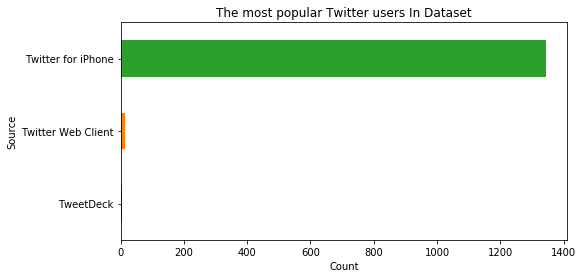

In [134]:
# Count the number of source in the dataset
count_source = clean_archive["source"].value_counts().sort_index()

# Plot the number of each source
count_source.plot(kind='barh',title='The most popular Twitter users In Dataset', figsize=(8,4))
plt.xlabel('Count')
plt.ylabel('Source');

The plot shows that the most common Twitter users are from the iPhone app. Which means the most important source for Twitter is the iPhone app. Comparing with other sources, the users are very low.

### Relationship Between Favorite Count & Rating Numerator & Retweet Count.

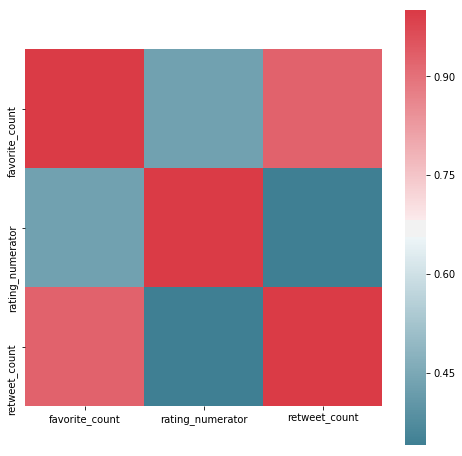

In [135]:
# Plot correlation map of favorite_count, rating_numerator, retweet_count
dataframe = clean_archive[['favorite_count','rating_numerator','retweet_count']]
f, ax = plt.subplots(figsize=(8, 8))
corr = dataframe.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax);

In [136]:
# correlation of three variables
clean_archive[['favorite_count', 'retweet_count', 'rating_numerator']].corr()

,favorite_count,retweet_count,rating_numerator
favorite_count,1.000000,0.925804,0.432491
retweet_count,0.925804,1.000000,0.339960
rating_numerator,0.432491,0.339960,1.000000


We have only one strong correlation between Retweet Count & Favorite Count, which mean the more tweet get retweet the more favorite will received. <br>

We expected a relationship between Rating Numerator & Retweet Count and Rating Numerator & Favorite Count but from the correlation it's a weak correlation which means that as Rating Numerator increases or decreases, there is a lower likelihood of there being a relationship with the (Retweet Count & Favorite Count).

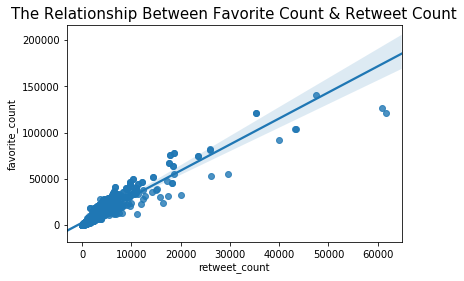

In [143]:
# Plot scatterplot of retweet_count and favorite_count
sns.regplot(x = clean_archive["retweet_count"], 
            y = clean_archive["favorite_count"]).set_title("The Relationship Between Favorite Count & Retweet Count",size=15);

Favorite and retweet counts are highly positively correlated as the correlation above shows.

### Retweet And Favorite Over Time

In [138]:
# Extract *day* from *timestamp* column.
# create new columns from datetime column
clean_archive['day'] = clean_archive['timestamp'].dt.day

In [139]:
# definding a function to calculate the mean for column2 and groupby by column1
def groupby_avg(col1,col2):
    avg_gb_data = clean_archive.groupby(col1)[col2].mean()
    return avg_gb_data

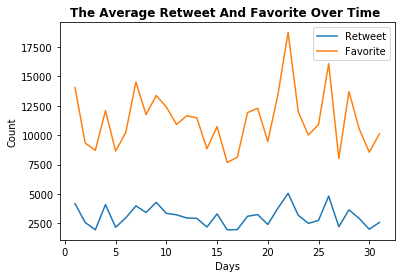

In [140]:
# plot the average retweet_count and favorite_count by each day in all months
plt.plot(groupby_avg("day","retweet_count"), label="Retweet")
plt.plot(groupby_avg("day","favorite_count"), label="Favorite")

plt.legend(loc='upper right')
plt.title("The Average Retweet And Favorite Over Time ", fontsize=12, fontweight='bold')
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()

The average of retweet and favorite is increasing and decreasing over time so we can't make conclusion about that, but there is a very clear conclusion the average number of likes much higher than retweet over time. which make us wonder Why do so many people favourite tweets rather than retweet?

### The Partitioning Of Doge Stage

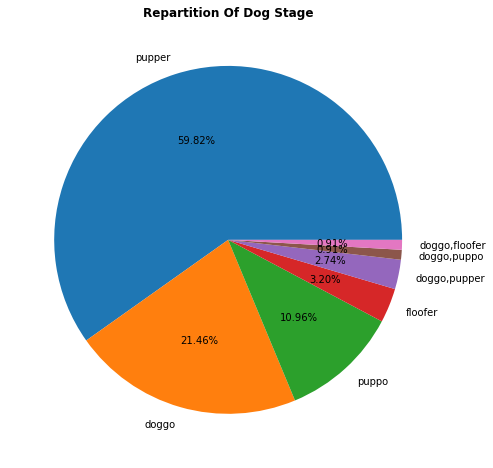

In [141]:
# Plot the data partitioned by dog stage
clean_archive['dog_stage'].value_counts().plot(kind = 'pie',legend=False, subplots=True,
                                               figsize=(8,8),autopct="%0.2f%%")

plt.title('Repartition Of Dog Stage',weight='bold', fontsize=12)
plt.ylabel('');

In [142]:
# group rating numerator by dog stage and describe
clean_archive.groupby('dog_stage')['rating_numerator'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,47.0,12.170213,1.290756,8.0,11.0,13.0,13.0,14.0
"doggo,floofer",2.0,11.000000,0.000000,11.0,11.0,11.0,11.0,11.0
"doggo,pupper",6.0,12.000000,0.632456,11.0,12.0,12.0,12.0,13.0
"doggo,puppo",2.0,13.000000,0.000000,13.0,13.0,13.0,13.0,13.0
floofer,7.0,12.142857,1.214986,10.0,11.5,13.0,13.0,13.0
pupper,131.0,11.251908,2.008993,4.0,10.0,11.0,12.0,27.0
puppo,24.0,12.250000,1.259745,9.0,12.0,13.0,13.0,14.0


The chart shows that people tend more to acquire pupper dogs maybe because they are small and so cute. And the ratings shows the doggo and puppo stage had the highest rate. for sure there pictures were very nice and lovely.

So puppers are getting much lower rates than the other dog types. We think the lower rating because pupper can be irresponsible dogs.

Floofers the lower rate they get is above 10. Maybe because they are so cute all the time.

<a id='resources'></a>
# Resources

http://docs.python-requests.org/en/master/ <br>
https://www.codementor.io/aviaryan/downloading-files-from-urls-in-python-77q3bs0un <br>
https://stackoverflow.com/questions/16694907/how-to-download-large-file-in-python-with-requests-py <br>
https://marcobonzanini.com/2015/03/02/mining-twitter-data-with-python-part-1/ <br>
https://stackoverflow.com/questions/43434399/efficient-way-to-parsing-from-tweets-json-formated-files <br>
http://adilmoujahid.com/posts/2014/07/twitter-analytics/ <br>
http://www.acme-dot.com/code-snippets/create-pandas-dataframe-from-tweets/ <br>
https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-dataframe-in-pandas-python <br>
https://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas <br>
